### Purpose
Here we are trying to learn polynomial weights to fit data generated using a sin function, as described in the first chapter. 
We will observe the fit by varying the degree of the polynomial.

We will also use jax instead of numy as it is auto differentiable. 

In [53]:
import matplotlib.pyplot as plt

import jax.numpy as jnp
import numpy as np
from jax import grad, jit, vmap, value_and_grad
from jax import random
import seaborn as sns

### Generate and plot the data

<AxesSubplot:>

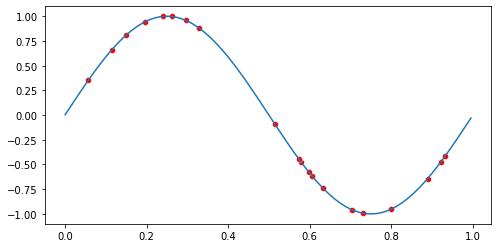

In [149]:
# create data
x = np.random.uniform(size=20)
y = np.sin(2 * np.pi * x)

# plot the data points
fig, ax = plt.subplots(figsize=(8,4))
sns.scatterplot(x=x, y=y, ax=ax, color='red')

# plot the sine curve
x_sin = np.random.uniform(size=1000)
sns.lineplot(x=x_sin, y=np.sin(2 * np.pi * x_sin), ax=ax)

In [192]:
def forward(w, b, x:float):
    """
    return sum of the polynomial - sum(wi*x**i)
    """
    powers = np.arange(w.shape[0])
    x_powers = jnp.power(x, powers) + b
    return jnp.dot(w, x_powers)

# vectorize the forward function, mapping over x
vforward = vmap(forward, in_axes=(None, None, 0))

def loss(w, b, x, y):
    '''
    sum of squres of error
    '''
    yhat = vforward(w, b, x)
    return jnp.sum(jnp.square(yhat-y))

lr = 0.01
num_iter = 200
# initialize
def train_and_plot(deg_of_polynomial, ax, print_loss=False, plot=False):
    w = np.random.uniform(3, -3, size=(deg_of_polynomial + 1))

    for idx in range(num_iter):
        # we want the gradient w.r.t the first param (w)
        l, grads = value_and_grad(loss, argnums=0)(w, b, x, y)
        if print_loss and idx%10 == 0:
            print(f'iter {idx} loss - {l}')
        
        w = w - lr*grads
        
    # plot the sine curve
    x_sin = np.random.uniform(size=1000)
    sns.lineplot(x=x_sin, y=np.sin(2 * np.pi * x_sin), ax=ax)
    
    # plot the data points
    sns.scatterplot(x=x, y=y, ax=ax, color='red')
    
    # plot the predicted points
    yhat = vforward(w, b, x)
    sns.lineplot(x=x, y=yhat, ax=ax, color='green')
    print(f'weights - {w}')
    
    

weights - [ 1.575818  -2.6819658]
weights - [ 1.733499   -3.6683333   0.95130765]
weights - [ 1.1866543  -0.10246377 -3.1090333   0.68271357]
weights - [ 1.1921643  -0.36825728 -2.4605827   0.10020328  0.24086243]
weights - [ 1.4173924 -2.3528292  1.5841345 -2.2562282 -0.7635199  1.1801198]
weights - [ 1.2594105  -1.6616585  -0.34389195 -2.1525471  -1.038857    1.2950019
  2.2547565 ]
weights - [ 1.2683975 -1.0375401 -3.4351392  0.4370251  1.4952605 -1.5455048
  3.1534414 -0.7696329]
weights - [ 1.0068916  -0.69567853 -2.5259404   0.21245657 -0.46700555 -3.3267906
  2.464733    0.8853986   2.716927  ]
weights - [ 1.8057039  -3.8093896  -0.8854235   1.6383555   1.3638291   0.08237955
 -0.24991216 -0.35997295  0.16225544 -0.56143695]
weights - [ 0.62200785  0.09886933 -1.0140159  -3.2317233  -2.040497    2.2836134
 -0.7403422  -1.8682172   1.7178123   2.7470558   2.454518  ]


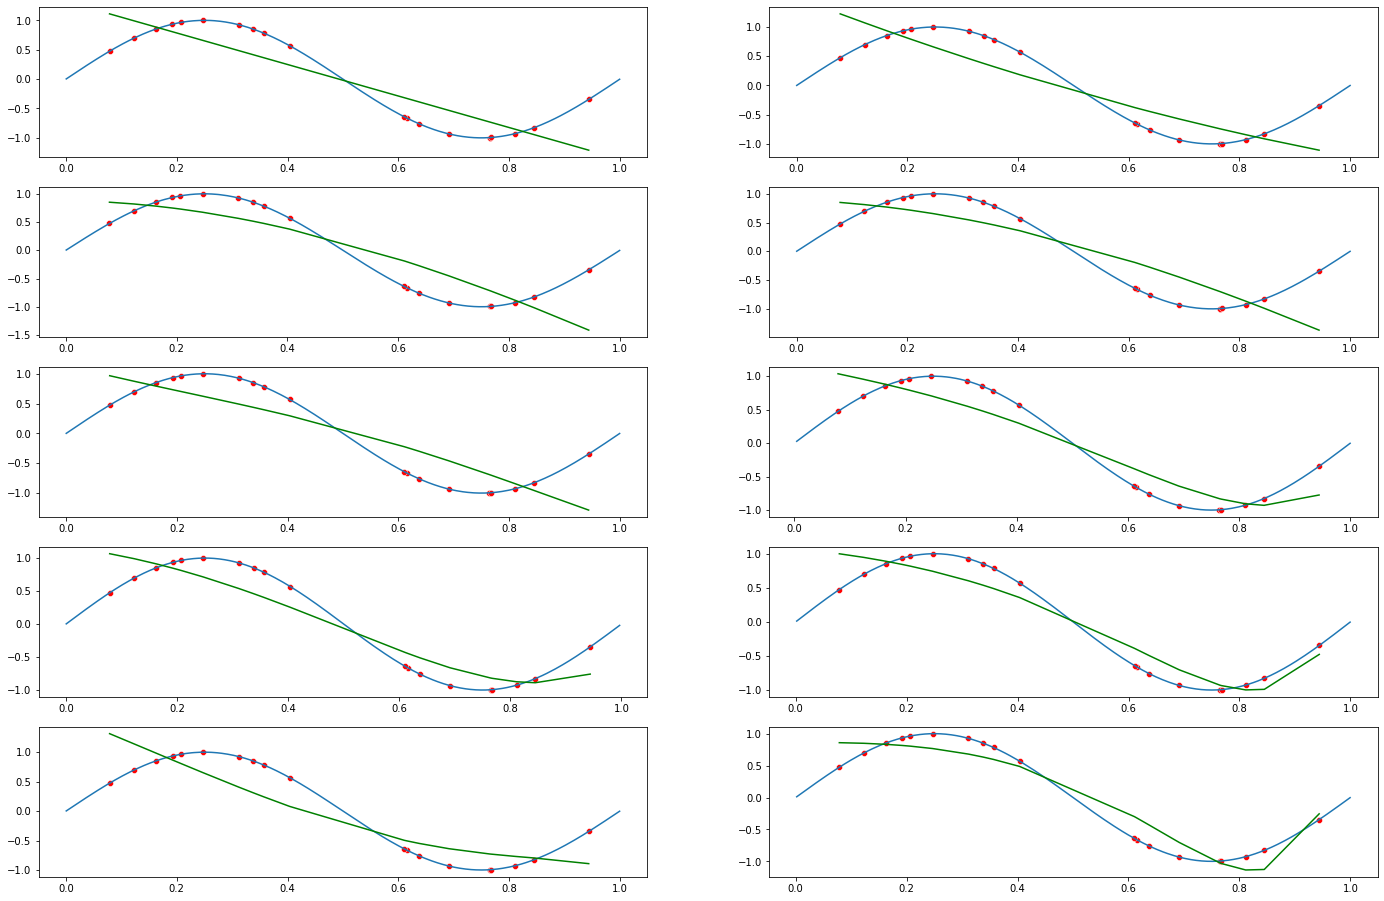

In [193]:
max_deg_poly = 10
fig, axs = plt.subplots(max_deg_poly//2, 2, figsize=(24, 16))

# create data
x = np.random.uniform(size=20)
y = np.sin(2 * np.pi * x)

for idx, ax in enumerate(axs.flatten()):
     train_and_plot(idx+1, ax, plot=False)
    



### points observed
 - initialization plays a very important role. When all w < 0, the final trained weights were not able to go beyond 1, leading to a poor fit. 